#AI&R A3 : Implement Goal Stack Planning
---
Implement goal stack planning for the following configuration from the blocks world.


*   Initial State


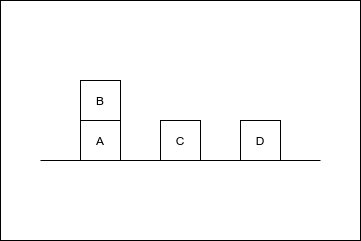


*   Goal State

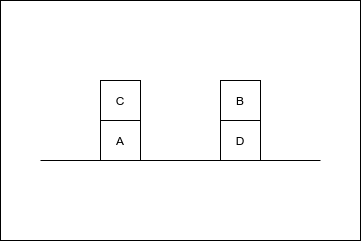

##Mathematical Model

> S = {s; e; X; Y; Fme; Ff; DD; NDD}

s = initial state
*   ON(B,A) ∧ ONTABLE(A) ∧ ONTABLE(C) ∧ ONTABLE(D)

e = goal state
*   ON(C,A) ∧ ON(B,D) ∧ ONTABLE(A) ∧ ONTABLE(D)

X = {X1}
*   X1 = s

Y = {Y1}
*   Y1 = e

Fme = {f0}
*   f0 = function to perform Goal Stack Planning

Ff = {f1, f2, f3, f4, f5}
where
*   f1 = function to display final path
*   f2 = function to replace unsatisfied goal with an action
*   f3 = function to check if object is predicate
*   f4 = function to check if object is action
*   f5 = function to get status of the arm

DD = List of Predicates of Initial State 

NDD = No non deterministic data

##Theory
*   There is a flat surface on which blocks can be placed
*   There are a number of square blocks, all the same size
*   They can be stacked one upon another
*   There is a robot arm that can manipulate the blocks

##Initial State

### ON(B,A) ∧ ONTABLE(A) ∧ ONTABLE(C) ∧ ONTABLE(D) ∧ CLEAR(B) ∧ CLEAR(C) ∧ CLEAR(D)

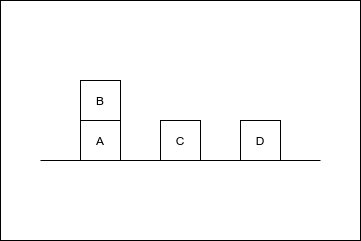

##Perception

###Predicates

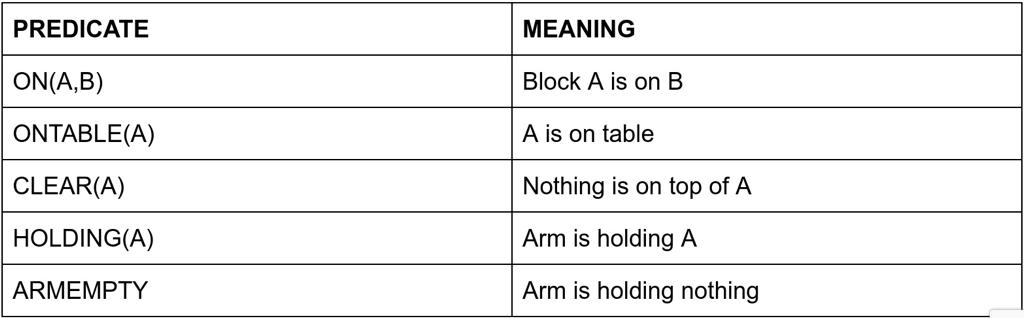

###Logical Statements

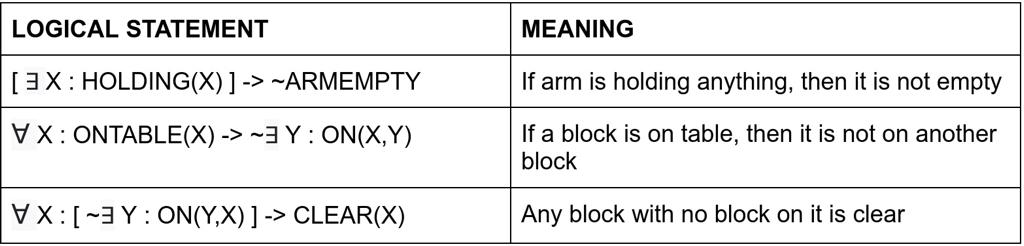

##Cognition

###Goal Stack Planning

####Theory
*   We work backwards from the goal, looking for an operator which has one
or more of the goal literals as one of its effects and then trying to satisfy
the preconditions of the operator.
*   The preconditions of the operator become
subgoals that must be satisfied. We keep doing this until we reach the initial
state.
*   Goal stack planning uses a stack to hold goals and actions to satisfy the
goals, and a knowledge base to hold the current state, action schemas and
domain axioms

####Algorithm
1. Push the goal state on the stack.
2. Repeat until the stack is empty:
  1.  If stack top is a compound goal
    1.    push its unsatisfied subgoals on the stack.
  2.  If stack top is a single unsatisfied goal
    1.    replace it by an action that makes it satisfied
    2.    push the action’s precondition on the stack.
  3.  If stack top is an action
    1.    check for unsatisfied prerequisites
    2.    if all prerequisites are satisfied
        1.    pop action from the stack
        2.    execute it
        3.    change the knowledge base by the action’s effects.
    3.    else
        1.    push unsatisfied preconditions on the stack
  4.  If stack top is a satisfied goal
    1.    pop it from the stack.

##Action

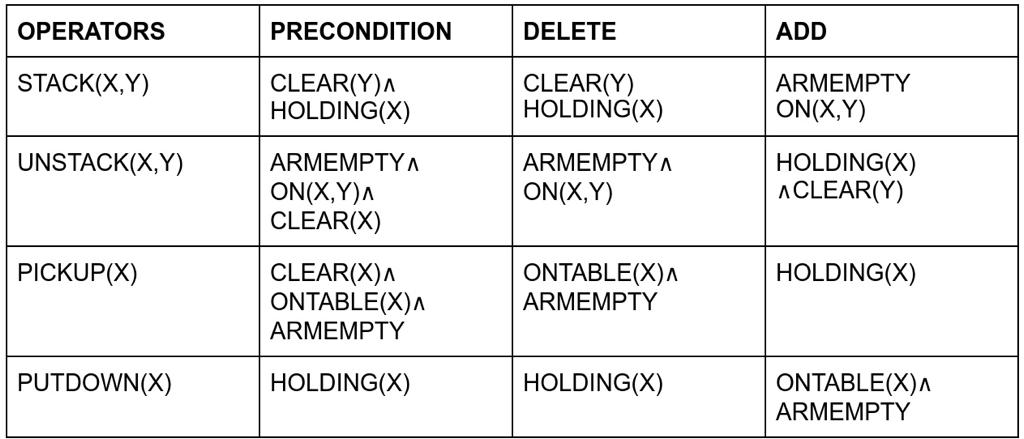

##Goal State

###ON(C,A) ∧ ON(B,D) ∧ ONTABLE(A) ∧ ONTABLE(D) ∧ CLEAR(C) ∧ CLEAR(B)

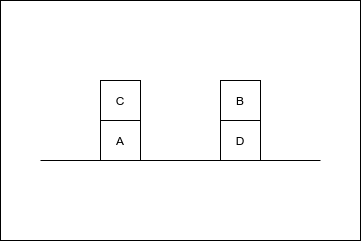

##Class Diagram

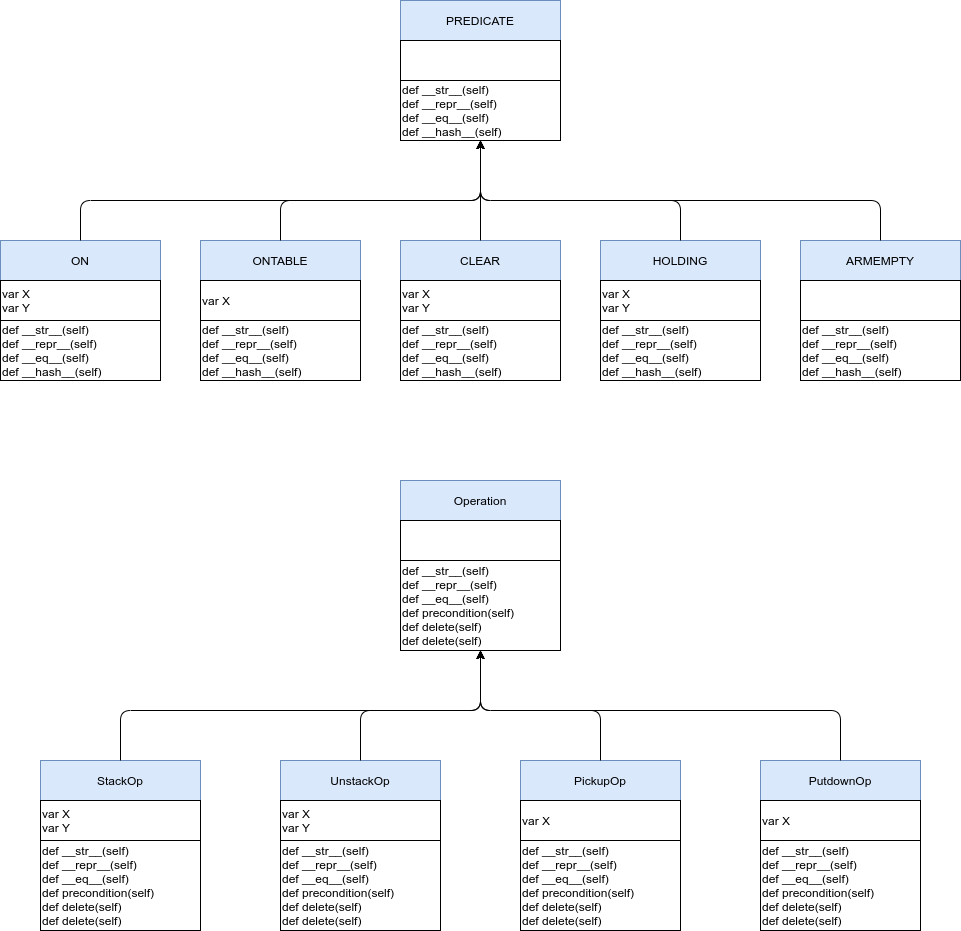

##Main Program

In [ ]:
#Base Classes

class PREDICATE:
  def __str__(self):
    pass
  def __repr__(self):
    pass
  def __eq__(self, other) :
    pass
  def __hash__(self):
    pass
  def get_action(self, world_state):
    pass

class Operation:
  def __str__(self):
    pass
  def __repr__(self):
    pass
  def __eq__(self, other) :
    pass
  def precondition(self):
    pass
  def delete(self):
    pass
  def add(self):
    pass


#PREDICATE - ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY

class ON(PREDICATE):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "ON({X},{Y})".format(X=self.X,Y=self.Y)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))

  def get_action(self, world_state):
    return StackOp(self.X,self.Y)


class ONTABLE(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "ONTABLE({X})".format(X=self.X)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))

  def get_action(self, world_state):
    return PutdownOp(self.X)


class CLEAR(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "CLEAR({X})".format(X=self.X)
    self.X = X

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
    return hash(str(self))

  def get_action(self, world_state):
    for predicate in world_state:
      if isinstance(predicate,ON) and predicate.Y==self.X:
        return UnstackOp(predicate.X, predicate.Y)
    return None


class HOLDING(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "HOLDING({X})".format(X=self.X)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
    return hash(str(self))

  def get_action(self, world_state):
    X = self.X
    if ONTABLE(X) in world_state:
      return PickupOp(X)
    else:
      for predicate in world_state:
        if isinstance(predicate,ON) and predicate.X==X:
          return UnstackOp(X,predicate.Y)


class ARMEMPTY(PREDICATE):

  def __init__(self):
    pass

  def __str__(self):
    return "ARMEMPTY"

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
    return hash(str(self))

  def get_action(self, world_state=[]):
    for predicate in world_state:
      if isinstance(predicate,HOLDING):
        return PutdownOp(predicate.X)
    return None



#OPERATIONS - Stack, Unstack, Pickup, Putdown

class StackOp(Operation):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "STACK({X},{Y})".format(X=self.X,Y=self.Y)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    return [ CLEAR(self.Y) , HOLDING(self.X) ]

  def delete(self):
    return [ CLEAR(self.Y) , HOLDING(self.X) ]

  def add(self):
    return [ ARMEMPTY() , ON(self.X,self.Y) ]


class UnstackOp(Operation):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "UNSTACK({X},{Y})".format(X=self.X,Y=self.Y)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    return [ ARMEMPTY() , ON(self.X,self.Y) , CLEAR(self.X) ]

  def delete(self):
    return [ ARMEMPTY() , ON(self.X,self.Y) ]

  def add(self):
    return [ CLEAR(self.Y) , HOLDING(self.X) ]


class PickupOp(Operation):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "PICKUP({X})".format(X=self.X)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    return [ CLEAR(self.X) , ONTABLE(self.X) , ARMEMPTY() ]

  def delete(self):
    return [ ARMEMPTY() , ONTABLE(self.X) ]

  def add(self):
    return [ HOLDING(self.X) ]


class PutdownOp(Operation):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "PUTDOWN({X})".format(X=self.X)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    return [ HOLDING(self.X) ]

  def delete(self):
    return [ HOLDING(self.X) ]

  def add(self):
    return [ ARMEMPTY() , ONTABLE(self.X) ]


#Helper Functions

def isPredicate(obj):
  if obj.__class__ in [ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY]:
    return True
  else:
    return False

def isOperation(obj):
  if obj.__class__ in [StackOp, UnstackOp, PickupOp, PutdownOp]:
    return True
  else:
    return False

def arm_status(world_state):
  for predicate in world_state:
    if isinstance(predicate, HOLDING):
      return predicate
  return ARMEMPTY()

In [ ]:
class GoalStackPlanner:

  def __init__(self, initial_state, goal_state):
    self.initial_state = initial_state
    self.goal_state = goal_state

  def get_steps(self):

    #Store Steps
    steps = []

    #Program Stack
    stack = []

    #World State/Knowledge Base
    world_state = self.initial_state.copy()

    #Initially push the goal_state as compound goal onto the stack
    stack.append(self.goal_state.copy())

    #Repeat until the stack is empty
    while len(stack)!=0:

      #Get the top of the stack
      stack_top = stack[-1]

      #If Stack Top is Compound Goal, push its unsatisfied goals onto stack
      if type(stack_top) is list:
        compound_goal = stack.pop()
        for goal in compound_goal:
          if goal not in world_state:
            stack.append(goal)

      #If Stack Top is an action
      elif isOperation(stack_top):

        #Peek the operation
        operation = stack[-1]

        all_preconditions_satisfied = True

        #Check if any precondition is unsatisfied and push it onto program stack
        for predicate in operation.delete():
          if predicate not in world_state:
            all_preconditions_satisfied = False
            stack.append(predicate)

        #If all preconditions are satisfied, pop operation from stack and execute it    
        if all_preconditions_satisfied:
          
          stack.pop()
          steps.append(operation)

          for predicate in operation.delete():
            world_state.remove(predicate)
          for predicate in operation.add():
            world_state.append(predicate)

            
      #If Stack Top is a single satisfied goal
      elif stack_top in world_state:
        stack.pop()

      #If Stack Top is a single unsatisfied goal
      else:
        unsatisfied_goal = stack.pop()

        #Replace Unsatisfied Goal with an action that can complete it
        action = unsatisfied_goal.get_action(world_state)

        stack.append(action)
        #Push Precondition on the stack
        for predicate in action.precondition():
          if predicate not in world_state:
            stack.append(predicate)

    return steps

In [ ]:
initial_state = [
  ON('B','A'),
  ONTABLE('A'),ONTABLE('C'),ONTABLE('D'),
  CLEAR('B'),CLEAR('C'),CLEAR('D'),
  ARMEMPTY()
]

goal_state = [  
  ON('B','D'),ON('C','A'),
  ONTABLE('D'),ONTABLE('A'),
  CLEAR('B'),CLEAR('C'),
  ARMEMPTY()
]

goal_stack = GoalStackPlanner(initial_state=initial_state, goal_state=goal_state)
steps = goal_stack.get_steps()
print(steps)

[PICKUP(C), PUTDOWN(C), UNSTACK(B,A), PUTDOWN(B), PICKUP(C), STACK(C,A), PICKUP(B), STACK(B,D)]


Start State

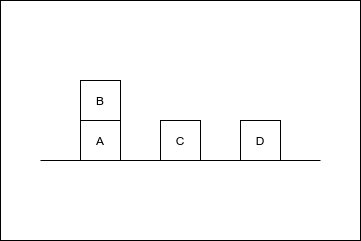

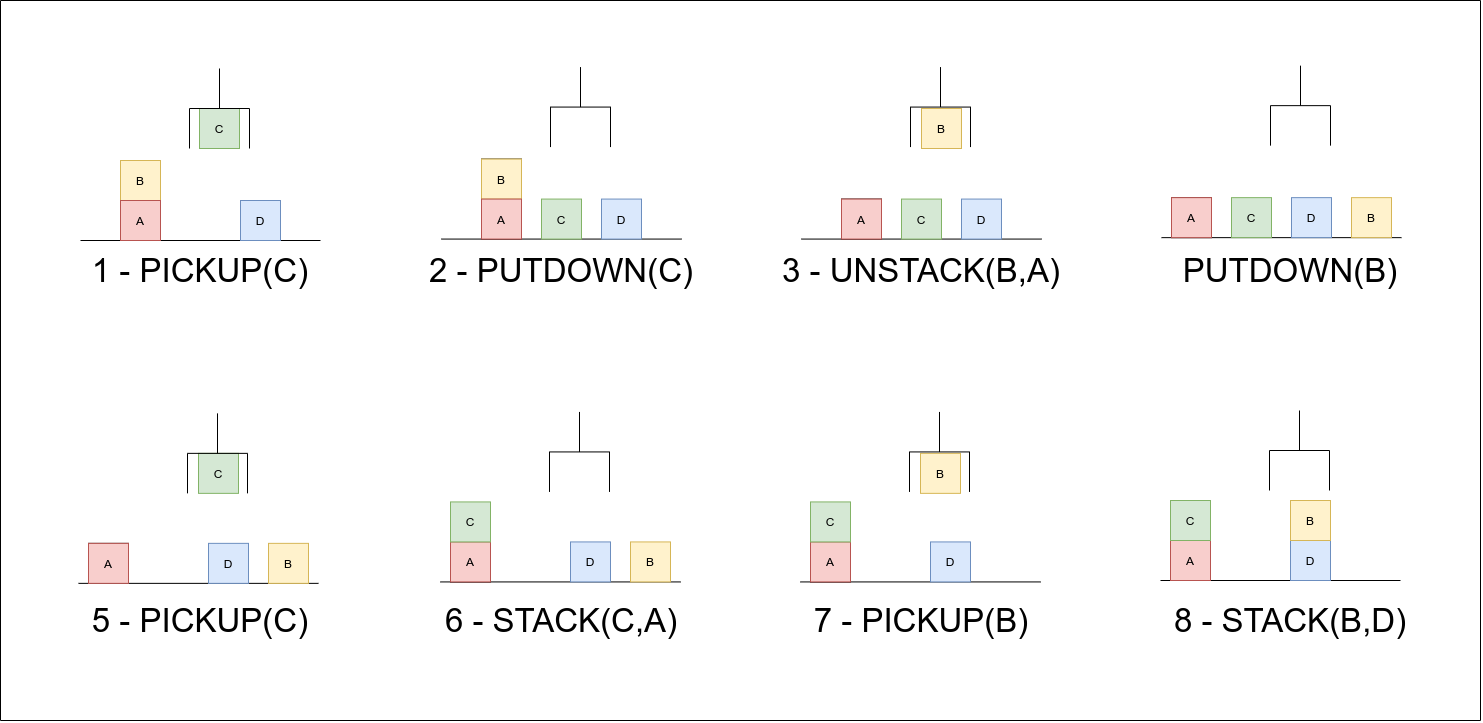

End State

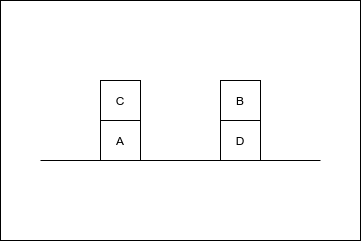